<a href="https://colab.research.google.com/github/krishna324-art/Practice_Notebooks/blob/main/Random_Classifier_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split,KFold

In [66]:
np.random.seed(0)#for reproducibility

In [67]:
#dogs:higher flapiness index,lower whisker length
dogs_whisker_length=np.random.normal(loc=5,scale=1,size=10)#x coordinate
dogs_ear_flappiness_index=np.random.normal(loc=8,scale=1,size=10)#y coordinate

In [68]:
dogs_ear_flappiness_index

array([8.14404357, 9.45427351, 8.76103773, 8.12167502, 8.44386323,
       8.33367433, 9.49407907, 7.79484174, 8.3130677 , 7.14590426])

In [69]:
dogs_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [70]:
#cats:lower ear flappines index,higher whisker length
cats_whisker_length=np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness_index=np.random.normal(loc=5,scale=1,size=10)

In [71]:
cats_ear_flappiness_index


array([5.15494743, 5.37816252, 4.11221425, 3.01920353, 4.65208785,
       5.15634897, 6.23029068, 6.20237985, 4.61267318, 4.69769725])

In [72]:
cats_whisker_length

array([ 5.44701018,  8.6536186 ,  8.8644362 ,  7.25783498, 10.26975462,
        6.54563433,  8.04575852,  7.81281615,  9.53277921,  9.46935877])

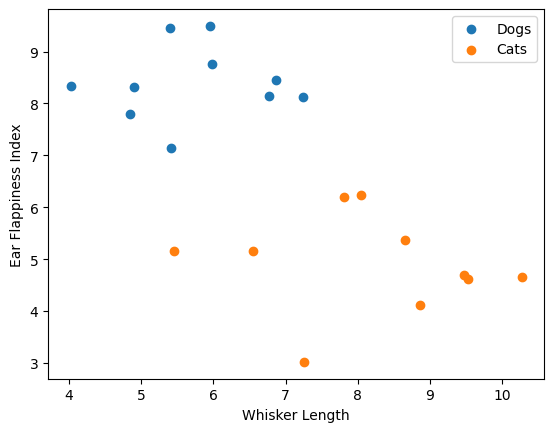

In [73]:
#plot the data points
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label='Dogs')
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label='Cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.legend()
plt.show()

In [74]:
#implementing ranodm linerar classification
def random_linear_classification(data_dogs,data_cats,k,d):#d is the no of theta or no of features
  best_error=float('inf')
  best_theta=None
  best_theta0=None

  for _ in range(k):
       theta=np.random.normal(size=d)
       theta0=np.random.normal()

       error=compute_error(data_dogs,data_cats,theta,theta0)
       if error<best_error:
         best_error=error
         best_theta=theta
         best_theta0=theta0
  return best_theta,best_theta0


In [75]:
def compute_error(data_dogs,data_cats,theta,theta0):
  error=0
  for x_dog in data_dogs:
    if np.dot(theta,x_dog)+ theta0<=0:
      error+=1
  for x_cat in data_cats:
    if np.dot(theta,x_cat)+ theta0>0:
      error+=1
  return error

In [76]:
#prepare the data for algorithm
dogs_data=np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data=np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T
data=np.vstack((dogs_data,cats_data))
labels=np.hstack((np.zeros(len(dogs_data)),np.ones(len(cats_data))))

In [77]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [78]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

In [79]:
X_test

array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351]])

In [80]:
X_train

array([[ 4.89678115,  8.3130677 ],
       [ 4.02272212,  8.33367433],
       [ 8.6536186 ,  5.37816252],
       [ 7.2408932 ,  8.12167502],
       [ 9.53277921,  4.61267318],
       [ 8.04575852,  6.23029068],
       [ 7.25783498,  3.01920353],
       [ 5.97873798,  8.76103773],
       [ 5.4105985 ,  7.14590426],
       [ 9.46935877,  4.69769725],
       [ 6.86755799,  8.44386323],
       [ 8.8644362 ,  4.11221425],
       [ 4.84864279,  7.79484174],
       [ 5.44701018,  5.15494743],
       [10.26975462,  4.65208785],
       [ 5.95008842,  9.49407907]])

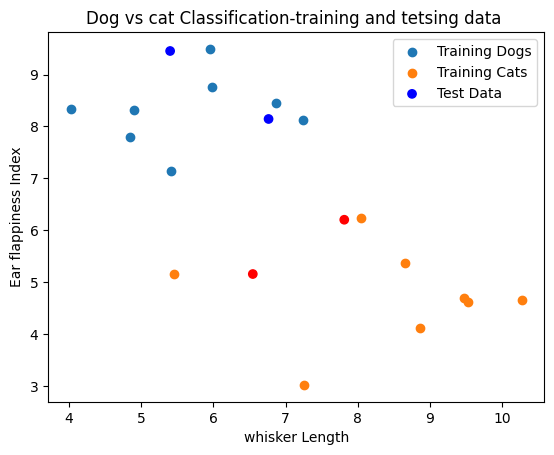

In [81]:
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],label='Training Dogs')
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],label='Training Cats')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='bwr',label='Test Data')
plt.xlabel('whisker Length')
plt.ylabel('Ear flappiness Index')
plt.title('Dog vs cat Classification-training and tetsing data ')
plt.legend()
plt.show()

In [82]:
#implementing ranodm linerar classification
def random_linear_classification(data_dogs,data_cats,k,d, random_state=None):#d is the no of theta or no of features
  best_error=float('inf')
  best_theta=None
  best_theta0=None

  for i in range(k):
       if random_state is not None:
            np.random.seed(random_state + i) # Use a different seed for each iteration
       theta=np.random.normal(size=d)
       theta0=np.random.normal()

       error=compute_error(data_dogs,data_cats,theta,theta0)
       if error<best_error:
         best_error=error
         best_theta=theta
         best_theta0=theta0
  return best_theta,best_theta0,best_error

In [83]:
def compute_error(data_dogs,data_cats,theta,theta0):
  error=0
  for x_dog in data_dogs:
    if np.dot(theta,x_dog)+ theta0<=0:
      error+=1
  for x_cat in data_cats:
    if np.dot(theta,x_cat)+ theta0>0:
      error+=1
  return error

In [96]:
k=40#no of interations
d=2 #no of features
best_theta_train,best_theta0_train,train_error=random_linear_classification(X_train[y_train==0],X_train[y_train==1],k,d, random_state=42)

In [97]:
#plot teh decision boundary
x_vals=np.linspace(2,10,100)
y_vals=(-best_theta_train[0]/best_theta_train[1])*x_vals-(best_theta0_train/best_theta_train[1])

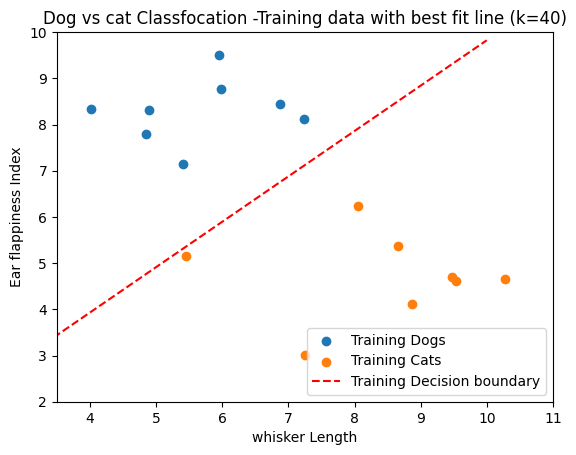

In [98]:
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],label='Training Dogs')
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],label='Training Cats')
plt.plot(x_vals,y_vals,color='red',linestyle='--',label='Training Decision boundary')
plt.xlim([3.5,11])
plt.ylim([2,10])
plt.xlabel('whisker Length')
plt.ylabel('Ear flappiness Index')
plt.title(f'Dog vs cat Classfocation -Training data with best fit line (k={k})')
plt.legend()
plt.show()

In [87]:
print(f"training Error:{train_error}")

training Error:0


In [88]:
#compute tetsing error
test_error=compute_error(X_test[y_test==0],X_test[y_test==1],best_theta_train,best_theta0_train)
print(f"Testing Error:{test_error}")

Testing Error:0


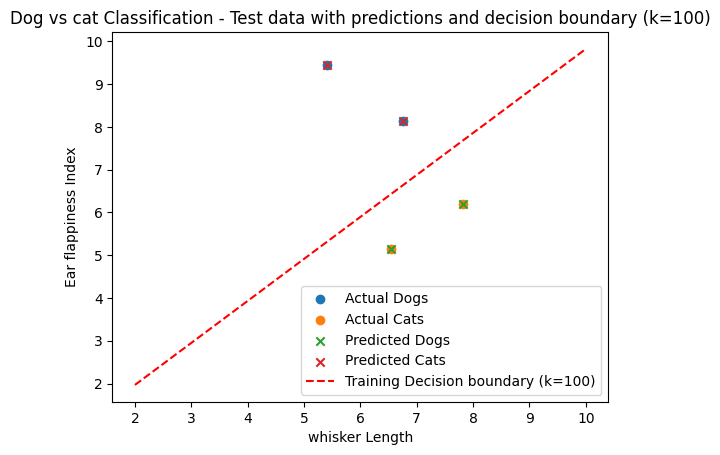

In [89]:
#plot the actual test data and predict the class
plt.scatter(X_test[y_test==0][:,0],X_test[y_test==0][:,1],label='Actual Dogs')
plt.scatter(X_test[y_test==1][:,0],X_test[y_test==1][:,1],label="Actual Cats")
#predict test data points using the decision boundary
predicted_labels=np.zeros_like(y_test)
for i,x in enumerate(X_test):
  if np.dot (best_theta_train,x)+ best_theta0_train>0:
    predicted_labels[i]=1
#plt the predicted test data points
plt.scatter(X_test[predicted_labels==0][:,0],X_test[predicted_labels==0][:,1],marker='x',label='Predicted Dogs')
plt.scatter(X_test[predicted_labels==1][:,0],X_test[predicted_labels==1][:,1],marker='x',label='Predicted Cats')
#plot the decision boundary

plt.plot(x_vals,y_vals,color='red',linestyle='--',label=f'Training Decision boundary (k={k})')
plt.xlabel('whisker Length')
plt.ylabel('Ear flappiness Index')
plt.title(f'Dog vs cat Classification - Test data with predictions and decision boundary (k={k})')
plt.legend()
plt.show()